Python



1.   Данные





In [1]:
import numpy as np # библиотека для работы с матрицами
import pandas as pd # библиотека для работы с таблицами
from scipy import stats # Модуль для работы со статистикой

In [2]:
import matplotlib.pyplot as plt #Визуализация библиотеки
import seaborn as sns
plt.style.use('ggplot')

In [3]:
%matplotlib inline

In [ ]:
df = pd.read_csv("Statistics.csv")
print(df.shape)
df.head()

NameError: name 'pd' is not defined

In [ ]:
df.dtypes

№                        int64
Район                   object
Оценка                  object
Стоимость, руб./сут.     int64
Предоплата, руб.         int64
Площадь, м^2             int64
Кол-во гостей            int64
Курение                 object
Вечеринки               object
балкон / лоджия         object
Спальные места           int64
Этаж                    object
Кол-во кроватей          int64
Питомцы                 object
Лифт                    object
Парковка                object
Страховой депозит        int64
Ремонт                  object
dtype: object




2.   Описательные статистики



In [ ]:
price = df["Стоимость, руб./сут."]
price.head()

0    2520
1    2300
2    3300
3    2290
4    4125
Name: Стоимость, руб./сут., dtype: int64

In [ ]:
price.mean()

2938.96

In [ ]:
price.median()

2831.0

In [ ]:
min = price.min()

In [ ]:
price.max()

5000

In [ ]:
price.std()

712.4387043632228

In [ ]:
price.var()

507568.9074747475

In [ ]:
price.sum()

293896

In [ ]:
price.quantile(0.5)

2831.0

In [ ]:
price.quantile(0.75)


3360.5

In [ ]:
pd.set_option('display.float.format','{:.2f}'.format)
price.agg(['min','max','sum','mean','median','std','var']) #функция агригирования нескольких показателей

min        1300.00
max        5000.00
sum      293896.00
mean       2938.96
median     2831.00
std         712.44
var      507568.91
Name: Стоимость, руб./сут., dtype: float64

In [ ]:
df[["Стоимость, руб./сут.","Предоплата, руб.", "Площадь, м^2", ]].describe()

,"Стоимость, руб./сут.","Предоплата, руб.","Площадь, м^2"
count,100.00,100.00,100.00
mean,2938.96,606.70,35.50
std,712.44,205.77,8.87
min,1300.00,260.00,18.00
25%,2447.50,458.00,30.00
50%,2831.00,594.00,36.00
75%,3360.50,720.00,40.25
max,5000.00,1500.00,64.00


In [ ]:
gd = df.groupby('Район')

In [ ]:
df.drop('№', axis= 1 , inplace= True )

In [ ]:
df.groupby('Район')['Стоимость, руб./сут.'].describe()

,count,mean,std,min,25%,50%,75%,max
Район,,,,,,,,
Октябрьский,34.00,3088.85,672.83,2050.00,2505.00,2985.00,3600.00,4420.00
Правобережный,33.00,3025.15,814.56,2200.00,2400.00,2645.00,3500.00,5000.00
Свердловский,33.00,2698.33,590.50,1300.00,2300.00,2750.00,3200.00,3530.00


In [ ]:
df.describe(include='object')

,Район,Оценка,Курение,Вечеринки,балкон / лоджия,Этаж,Питомцы,Лифт,Парковка,Ремонт
count,100,100,100,100,100,100,100,100,100,100
unique,3,21,3,2,2,3,2,2,2,3
top,Октябрьский,"10,00",нет,да,да,Верхний,да,да,да,евроремонт
freq,34,27,86,57,82,41,70,83,64,54


In [ ]:
df["Район"].value_counts(normalize=True)

Октябрьский     0.34
Правобережный   0.33
Свердловский    0.33
Name: Район, dtype: float64

In [ ]:

df["балкон / лоджия"].value_counts(normalize=True)

да    0.82
нет   0.18
Name: балкон / лоджия, dtype: float64

In [ ]:
df["Этаж"].value_counts()

Верхний    41
Нижний     33
Средний    26
Name: Этаж, dtype: int64

In [ ]:
df["Парковка"].value_counts()

да     64
нет    36
Name: Парковка, dtype: int64

In [ ]:
df["Ремонт"].value_counts()

евроремонт       54
дизайнерский     26
косметический    20
Name: Ремонт, dtype: int64

3. Визуализация


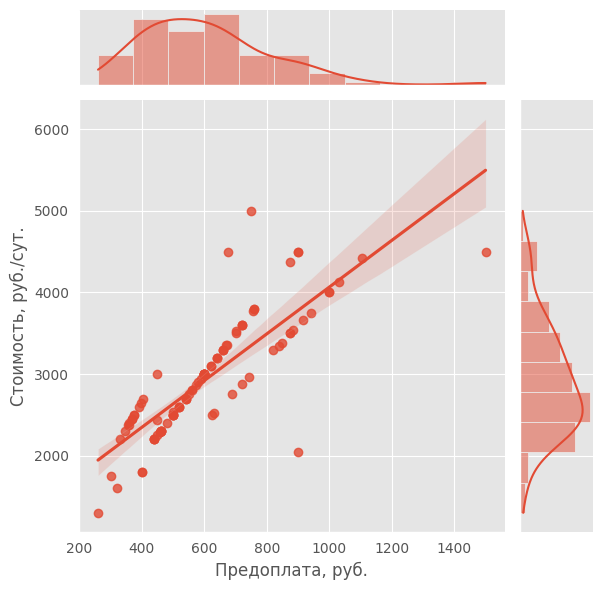

In [ ]:
sns.jointplot(x = "Предоплата, руб.",y ="Стоимость, руб./сут.", data = df, kind = 'reg',palette='CMRmap')

                      Стоимость, руб./сут.  Предоплата, руб.  Площадь, м^2
Стоимость, руб./сут.                  1.00              0.80          0.10
Предоплата, руб.                      0.80              1.00          0.15
Площадь, м^2                          0.10              0.15          1.00


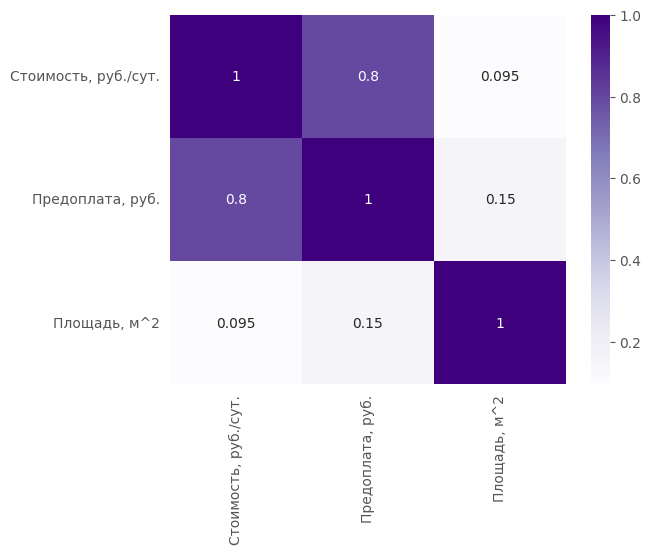

In [ ]:

df_new = df[df['Район'] == 'Правобережный']
data = df_new[[ 'Стоимость, руб./сут.', 'Предоплата, руб.','Площадь, м^2']]

print(data.corr())

dataplot = sns.heatmap(data.corr(), cmap="Purples", annot=True)



                      Стоимость, руб./сут.  Предоплата, руб.  Площадь, м^2
Стоимость, руб./сут.                  1.00              0.81          0.22
Предоплата, руб.                      0.81              1.00          0.17
Площадь, м^2                          0.22              0.17          1.00


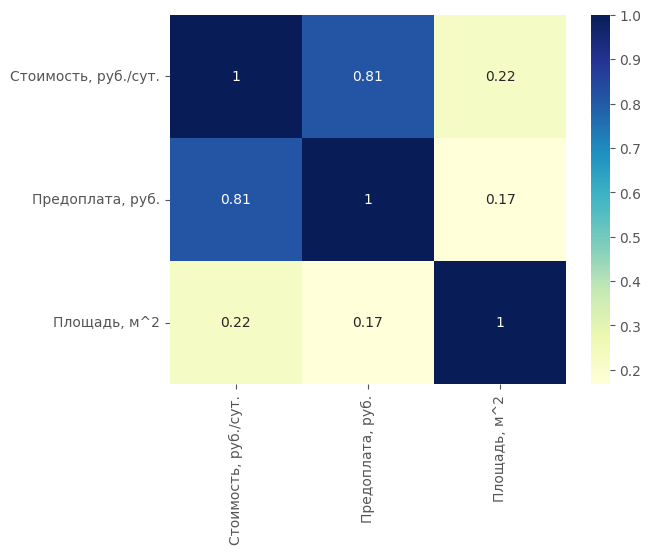

In [ ]:
df_new = df[df['Район'] == 'Октябрьский']
data = df_new[[ 'Стоимость, руб./сут.', 'Предоплата, руб.','Площадь, м^2']]

print(data.corr())

dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

                      Стоимость, руб./сут.  Предоплата, руб.  Площадь, м^2
Стоимость, руб./сут.                  1.00              0.91          0.45
Предоплата, руб.                      0.91              1.00          0.37
Площадь, м^2                          0.45              0.37          1.00


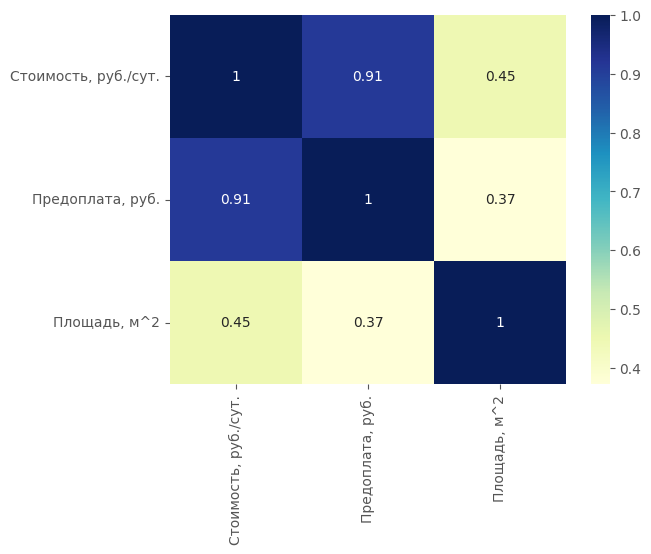

In [ ]:
df_new = df[df['Район'] == 'Свердловский']
data = df_new[[ 'Стоимость, руб./сут.', 'Предоплата, руб.','Площадь, м^2']]

print(data.corr())

dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

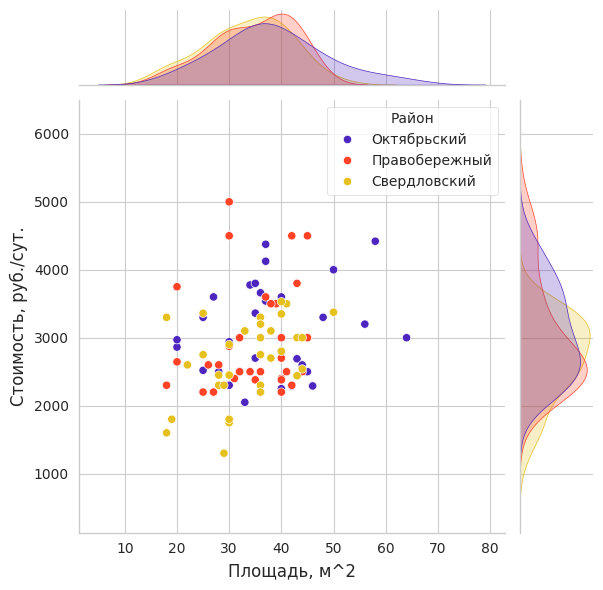

In [ ]:
sns.jointplot(x = "Площадь, м^2",y ="Стоимость, руб./сут.", data = df,palette='CMRmap', hue='Район')

In [4]:

sns.set_style("whitegrid")
sns.jointplot(x = "Площадь, м^2",y ="Предоплата, руб.", data = df, kind = 'reg',color = '#ff0c4a')

NameError: name 'df' is not defined

In [ ]:
df1 = df[['Стоимость, руб./сут.','Район']]
df1



,"Стоимость, руб./сут.",Район
0,2520,Октябрьский
1,2300,Октябрьский
2,3300,Октябрьский
3,2290,Октябрьский
4,4125,Октябрьский
...,...,...
95,3000,Свердловский
96,3200,Свердловский
97,2900,Свердловский
98,3375,Свердловский


<ipython-input-121-112db4b78734>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Район', x='Стоимость, руб./сут.',data=df[['Стоимость, руб./сут.','Район']],palette = "tab20",showmeans=True, meanprops={"marker": "x",


<Axes: xlabel='Стоимость, руб./сут.', ylabel='Район'>

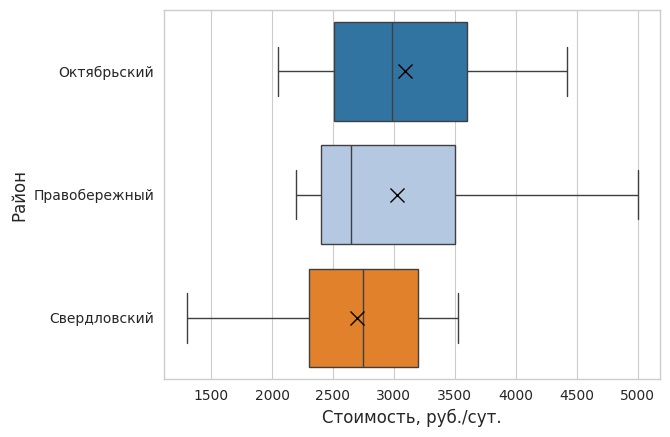

In [ ]:
sns.boxplot(y='Район', x='Стоимость, руб./сут.',data=df[['Стоимость, руб./сут.','Район']],
            palette = "tab20",showmeans=True,
            meanprops={"marker": "x",
                       "markeredgecolor": "black",
                       "markersize": "10"}, orient = 'h')

<ipython-input-122-555ff5cd9c50>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Этаж', x='Стоимость, руб./сут.',data=df2,palette="Paired",showmeans=True, meanprops={"marker": "x",


<Axes: xlabel='Стоимость, руб./сут.', ylabel='Этаж'>

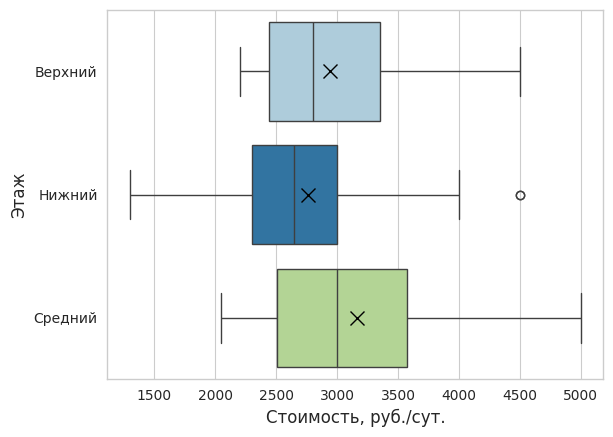

In [ ]:
df2 = df[['Стоимость, руб./сут.','Этаж']]
sns.boxplot(y='Этаж', x='Стоимость, руб./сут.',data=df2,palette="Paired",showmeans=True, meanprops={"marker": "x",
                       "markeredgecolor": "black",
                       "markersize": "10"} , orient = 'h')


In [ ]:
data = df['Район'].value_counts()
data

Октябрьский      34
Правобережный    33
Свердловский     33
Name: Район, dtype: int64

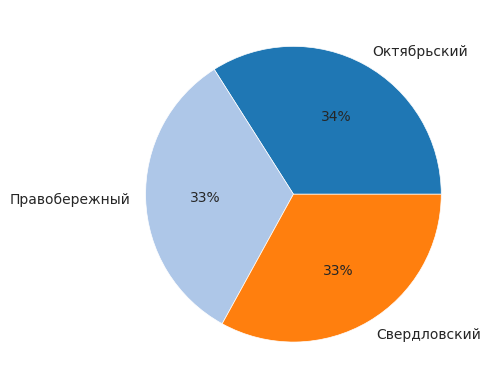

In [ ]:
sns.set_style('whitegrid')
colors = sns.color_palette('tab20')[ 0:3 ]
plt.pie(df['Район'].value_counts(), labels=['Октябрьский','Правобережный','Свердловский'], colors = colors, autopct='%.0f%%')
plt.show()

In [ ]:
data = df['Этаж'].value_counts()
data

Верхний    41
Нижний     33
Средний    26
Name: Этаж, dtype: int64

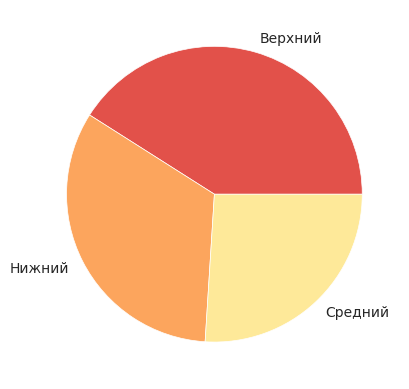

In [ ]:
sns.set_style('whitegrid')
colors = sns.color_palette('Spectral')
plt.pie(data, labels=['Верхний','Нижний','Средний'], colors = colors)
plt.show()

<ipython-input-134-72050280b326>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(y = 'Район',
<ipython-input-134-72050280b326>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = 'Район',


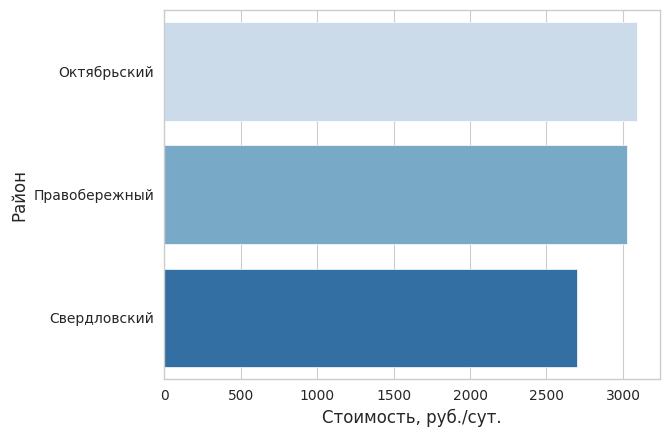

In [ ]:
data = df[['Район', 'Стоимость, руб./сут.']]


sns.barplot(y = 'Район',
            x = 'Стоимость, руб./сут.',
            data = data,
            palette = "Blues",
            ci = 0,
            orient = 'h')

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


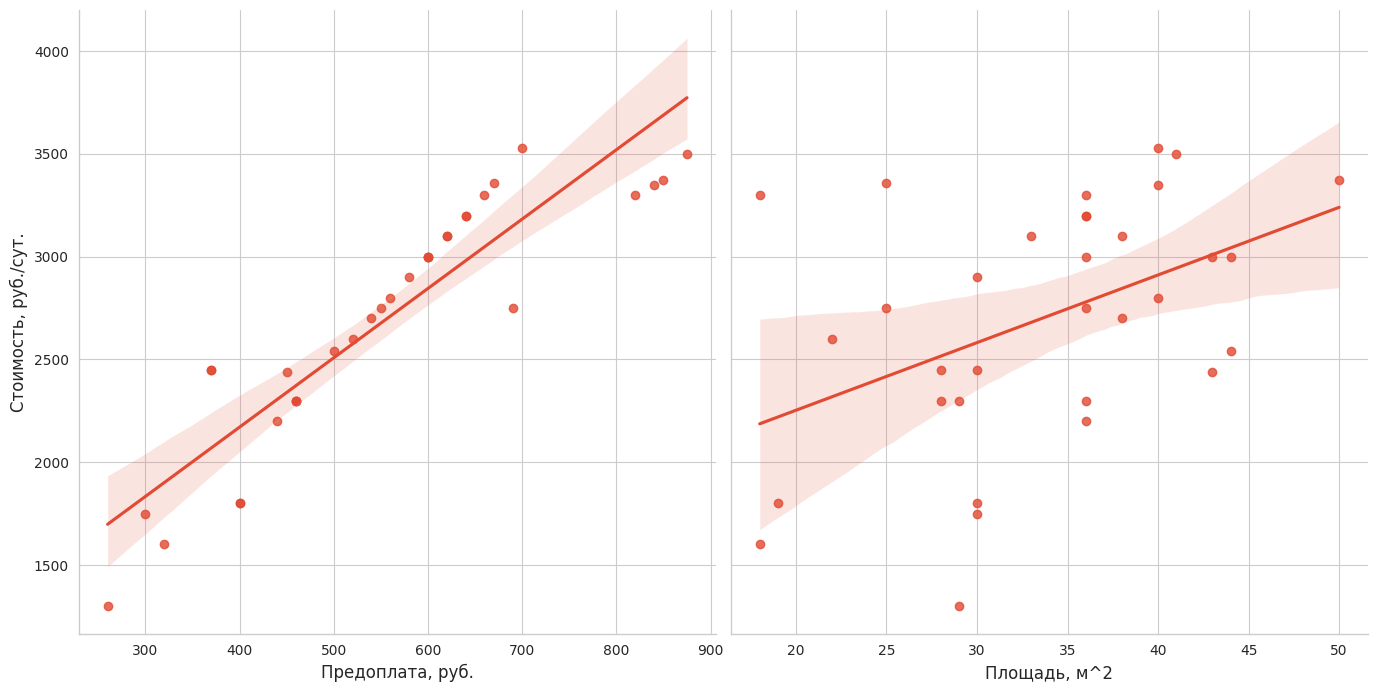

In [ ]:
df_new = df[df['Район'] == 'Свердловский']
sns.pairplot(df_new, y_vars = 'Стоимость, руб./сут.', x_vars=['Предоплата, руб.', 'Площадь, м^2'], kind = 'reg', size=7, diag_kind=None)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


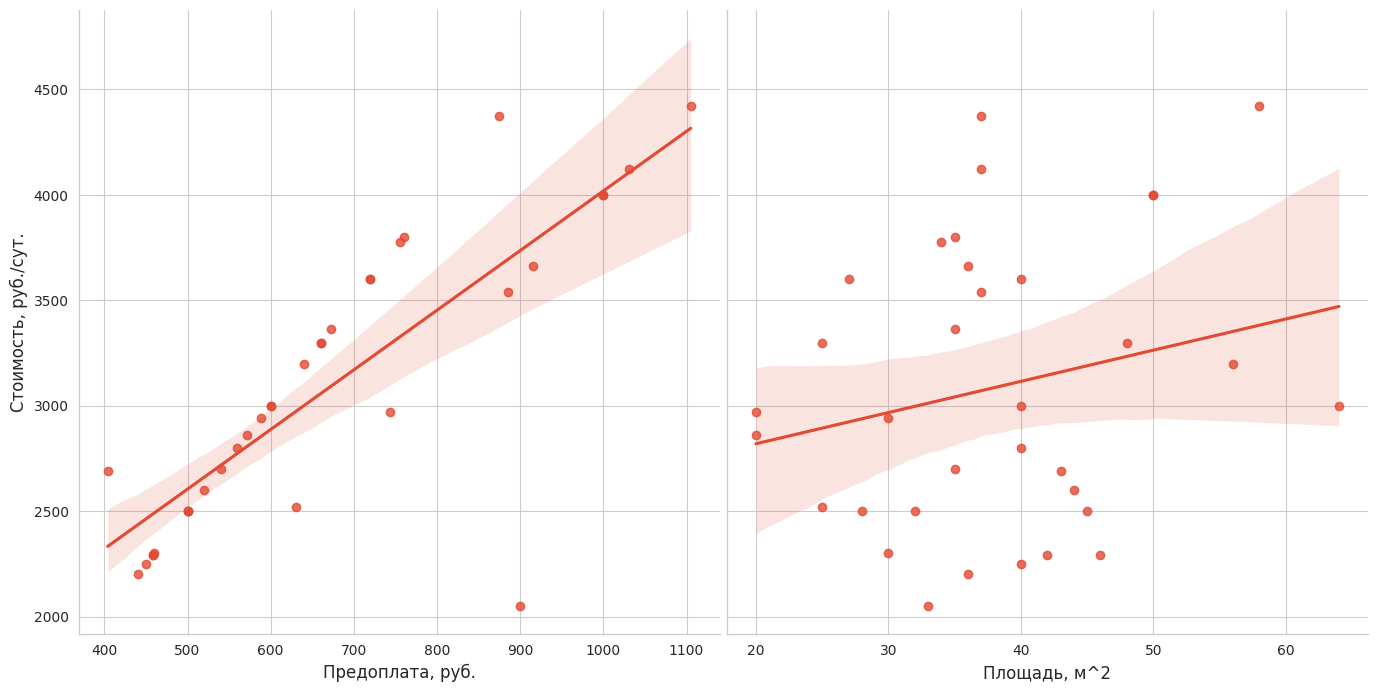

In [ ]:
df_new = df[df['Район'] == 'Октябрьский']
sns.pairplot(df_new, y_vars = 'Стоимость, руб./сут.', x_vars=['Предоплата, руб.', 'Площадь, м^2'], kind = 'reg', size=7, diag_kind=None)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


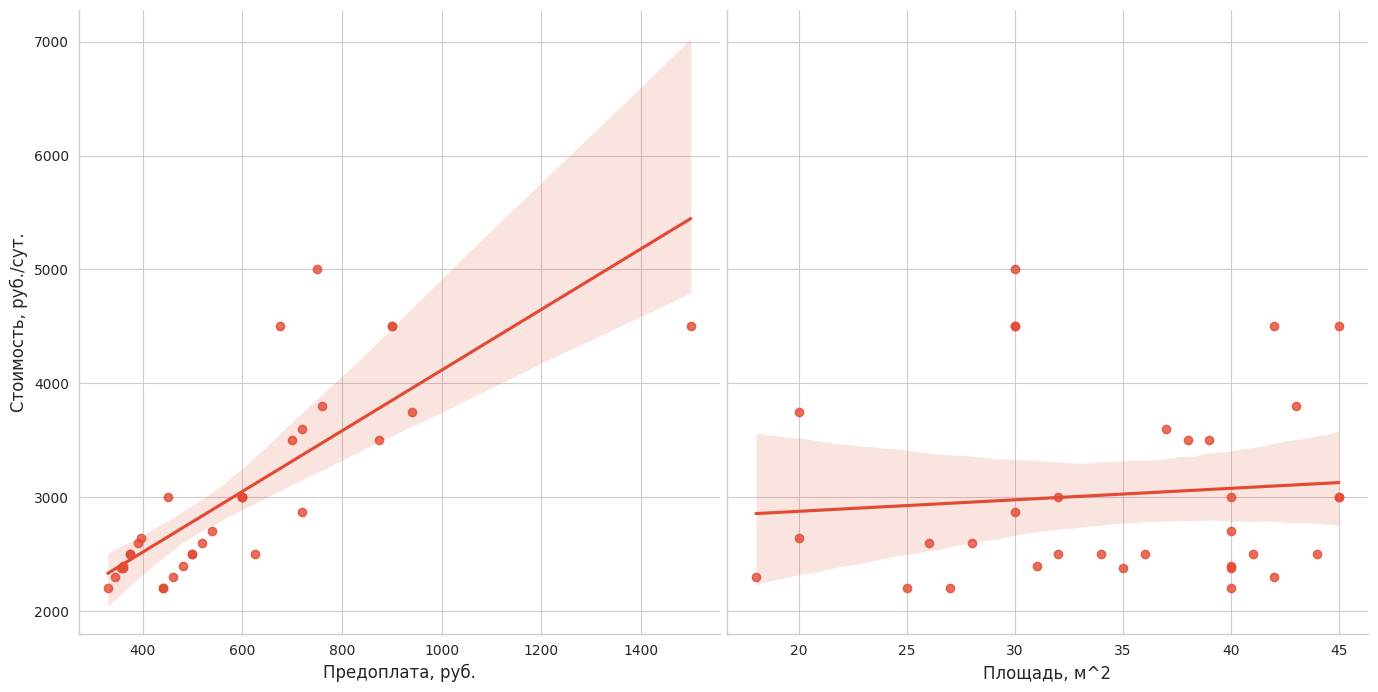

In [ ]:
df_new = df[df['Район'] == 'Правобережный']
sns.pairplot(df_new, y_vars = 'Стоимость, руб./сут.', x_vars=['Предоплата, руб.', 'Площадь, м^2'], kind = 'reg', size=7, diag_kind=None)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


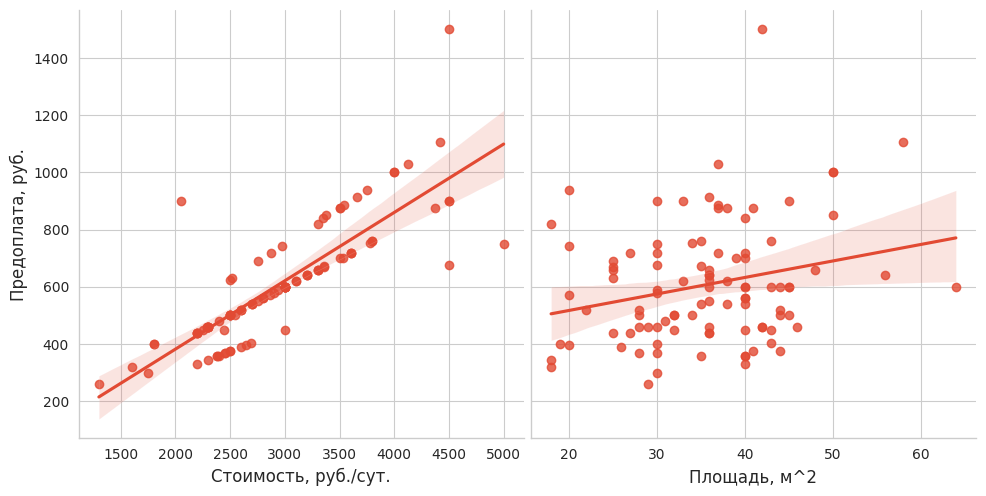

In [ ]:
sns.pairplot(df, y_vars = 'Предоплата, руб.', x_vars=['Стоимость, руб./сут.', 'Площадь, м^2'], kind = 'reg', size=5, diag_kind=None)